# Twitch Top 1000 Streamers Exploratory Data Analysis



We want to explore this database with basic information regarding top 1000 Twitch streamers, and find which variables have the most impact on "Views gained", an important metric Twitch streamers want to optimize for.

In [1]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
import warnings

## Reading and Understanding the Data

In [2]:
df = pd.read_csv("twitchdata-update.csv")
df.index = df.index + 1 # To match the indexing with the rank
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
1,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
2,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
3,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
4,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
5,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
996,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
997,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
998,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
999,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


Now we want to understand the nature of each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Now we want some basic summary statistics to understand the data better.

In [4]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


We also want to look at correlation values for each pair of columns as they might be useful in further analysis.

In [5]:
df.corr()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,-0.043197
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.044978
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.082750
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.081648
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.088521
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.093001
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,-0.088119
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,0.000972
Mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,-0.093001,-0.088119,0.000972,1.000000


A heat map would be a better way of visualizing this data.

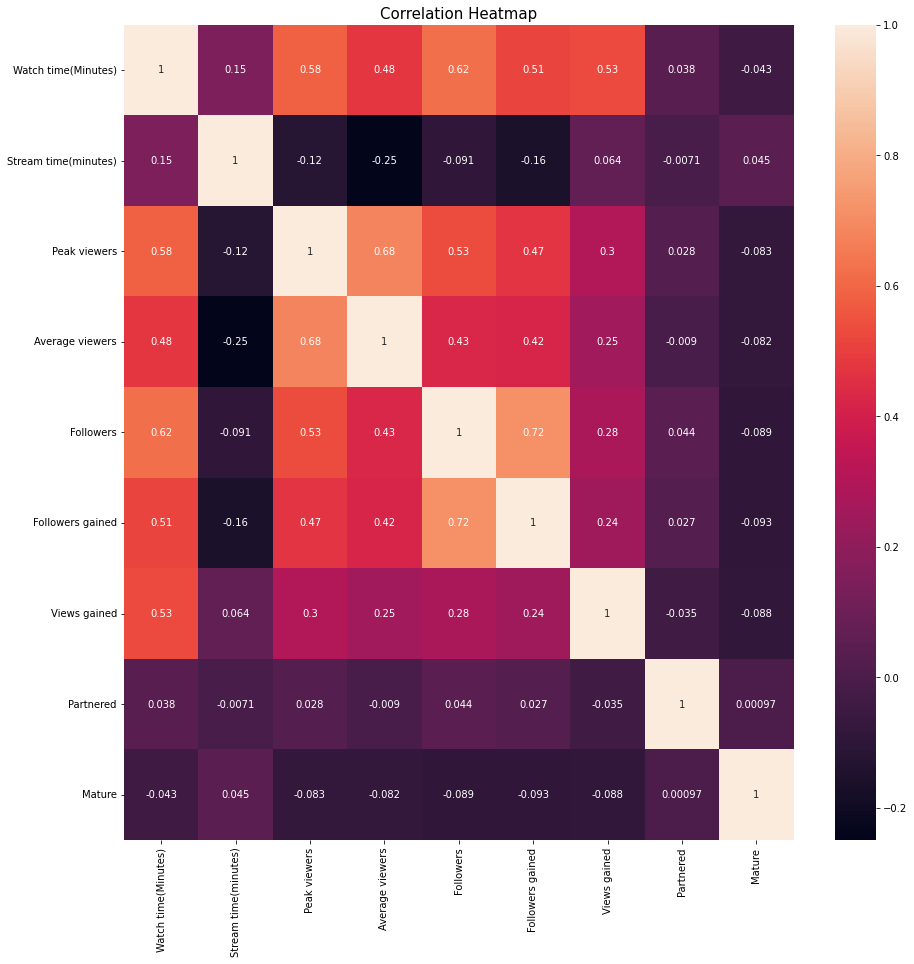

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize= 15)
plt.show()

**Insight:** This tells us that the columns in the dataset don't show very high correlation in any given pair, which means that we'll need a combination of factors to answer our initial question. In particular, the Views gained variable shows decent correlation with Watch time, but not much else.

## Top Views gained channels

We want to look at the top 10 channels by Views gained to get an idea of what that data is visualized as.

Text(0.5, 1.0, 'Top views gained channels')

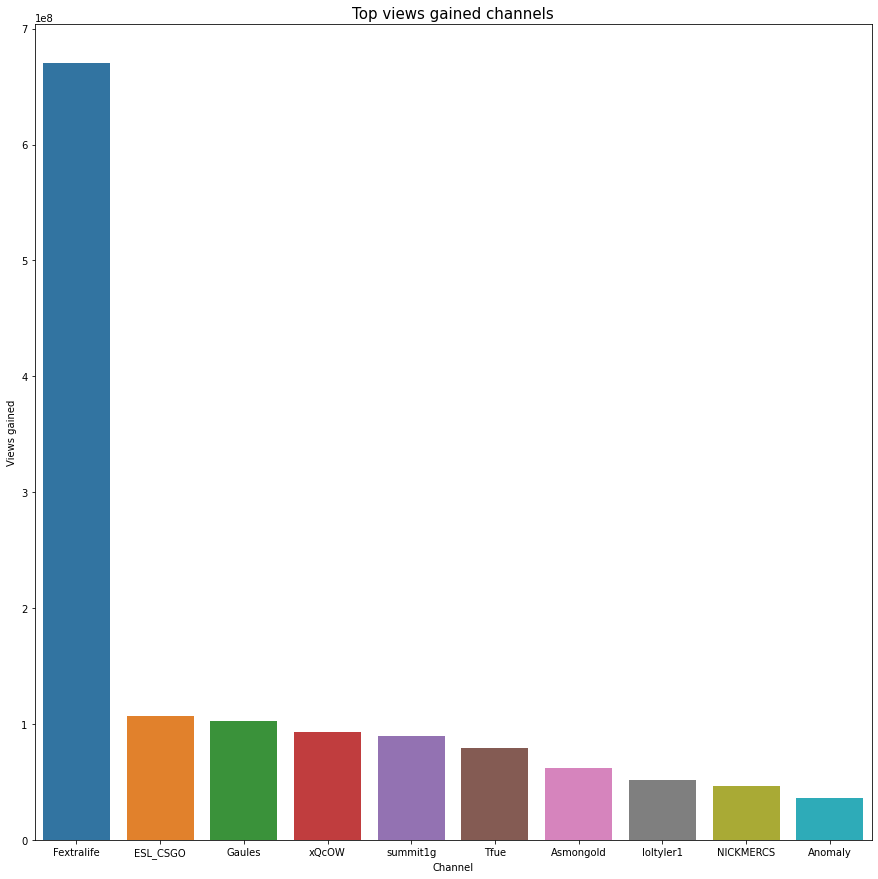

In [7]:
plt.figure(figsize=(15,15))
sns.barplot(x='Channel', y='Views gained', data=df[:10].sort_values(by='Views gained', ascending=False))
plt.title("Top views gained channels", fontsize=15)

**Insight:** We notice that one particular channel "Fextralife" has an anomalous number of Views gained while all other channels show a relatively stable number of Views gained. This outlier somewhat obscures further visualizations but is an important highlight of the dataset.

## Language Analysis

We want to look at the share of different languages among the top 1000 streamers. We narrow down our major Languages to the top 10 for the clarity of the pie chart.

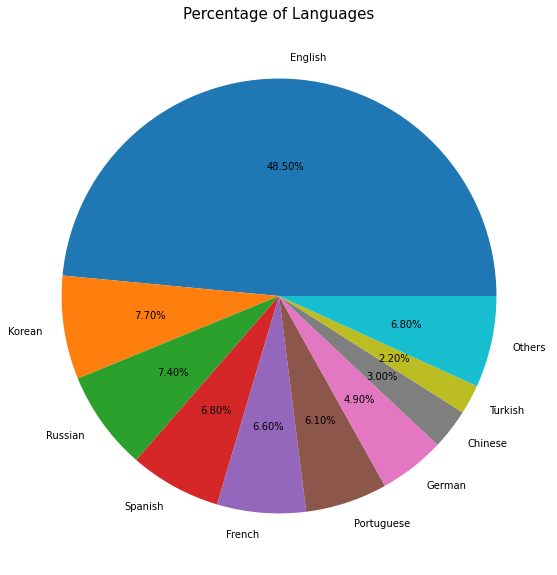

In [8]:
plt.figure(figsize=(15, 10))
language_df = df["Language"].value_counts().to_frame()
language_df = language_df.reset_index()
language_df.columns = ["Language", "Count"]
language_df_top = language_df[:9].copy()
new_row = pd.DataFrame(data= {"Language" : ["Others"], "Count" : [language_df["Count"][9:].sum()]
})
language_df_top = pd.concat([language_df_top, new_row])
plt.pie(language_df_top.Count, labels=language_df_top.Language, autopct="%0.2f%%")
plt.title("Percentage of Languages", fontsize=15)
plt.show()

**Insight:** As expected, English dominates the share of content on Twitch, but we want to see if there is any difference in Views gained based on language. In particular, we expect English language content to gain more views since it caters to a larger population of potential viewers.

Now we want to find out how the distribution of Views gained varies with Language.

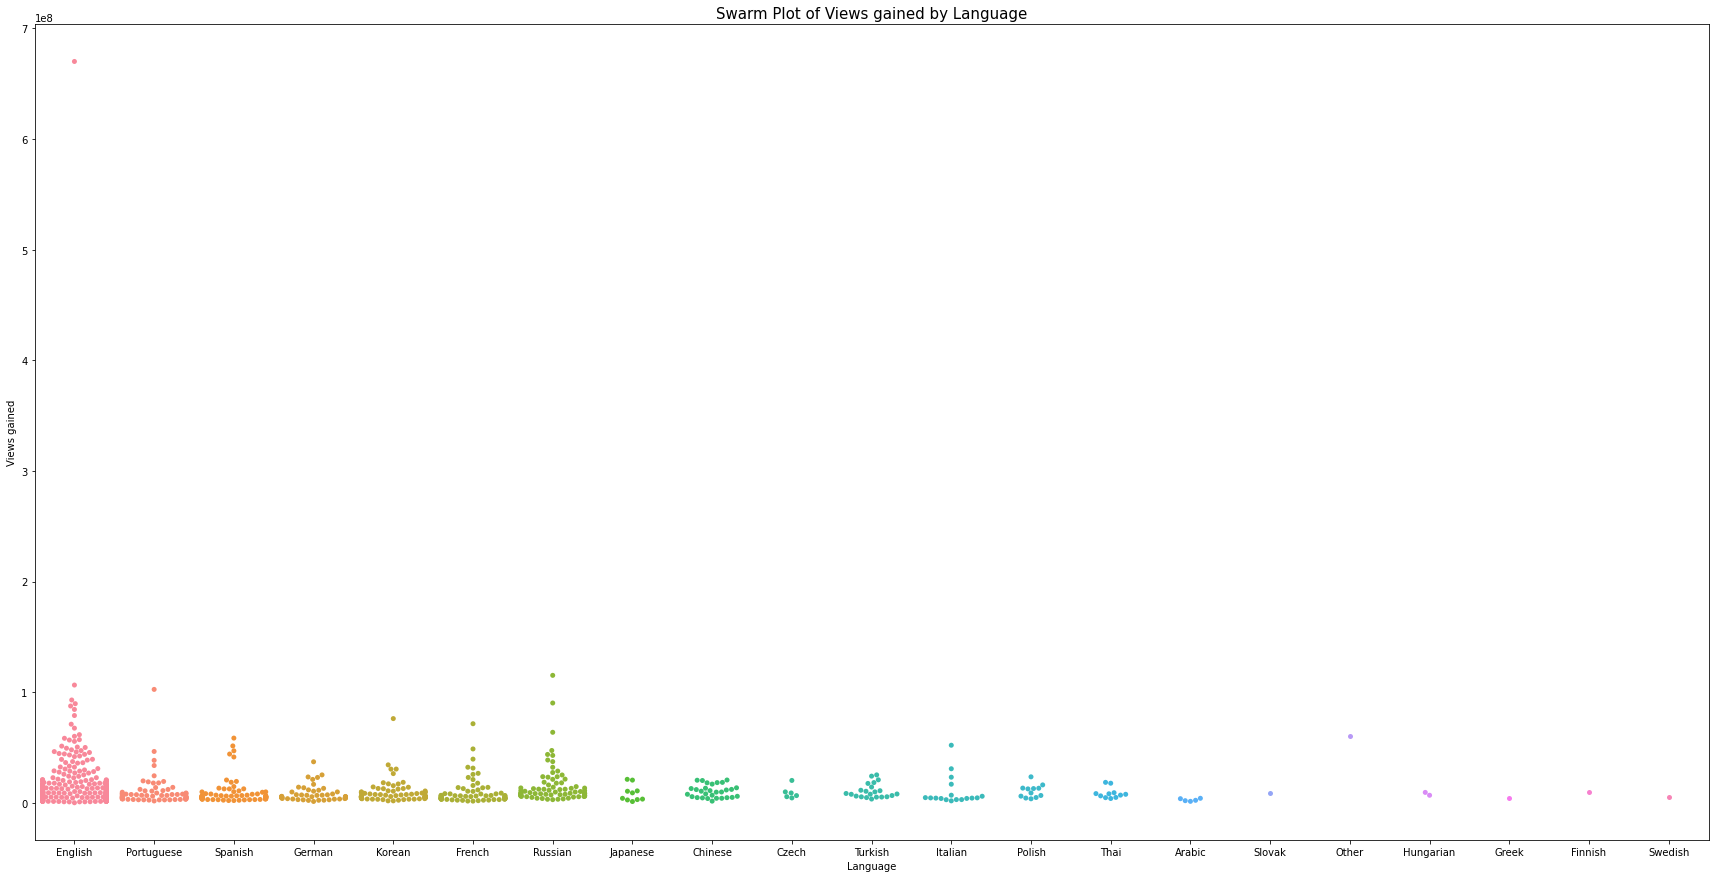

In [9]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(30,15))
sns.swarmplot(x="Language" , y = "Views gained" ,data=df)
plt.title("Swarm Plot of Views gained by Language", fontsize=15)
plt.show()

**Insight:** This plot tells us that there are no particularly striking variations in Views gained based on Language. Even though English content is dominant and can cater to more people, it doesn't show any marked advantage over other Languages, apart from one outlier mentioned above.

## Partnered and Mature Content

These are the only two variables that are boolean values. We want to see if there's any link between the two and Views gained.

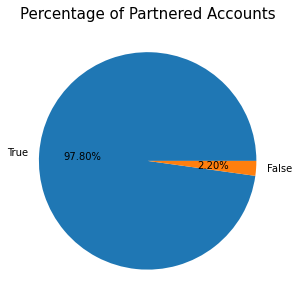

In [10]:
plt.figure(figsize=(5,5))
partnered = df["Partnered"].value_counts()
plt.pie(partnered.values, labels=partnered.index, autopct="%0.2f%%")
plt.title("Percentage of Partnered Accounts", fontsize=15)
plt.show()

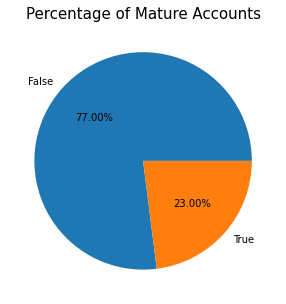

In [11]:
plt.figure(figsize=(5,5))
mature = df["Mature"].value_counts()
plt.pie(mature.values, labels=mature.index, autopct="%0.2f%%")
plt.title("Percentage of Mature Accounts", fontsize=15)
plt.show()

Now we want to see how Views gained varies with Mature content in a stream. Looking at the plot below, it's clear to see that there are more outliers for non-Mature cases, especially one particular one resulting in the abnormal spike. 

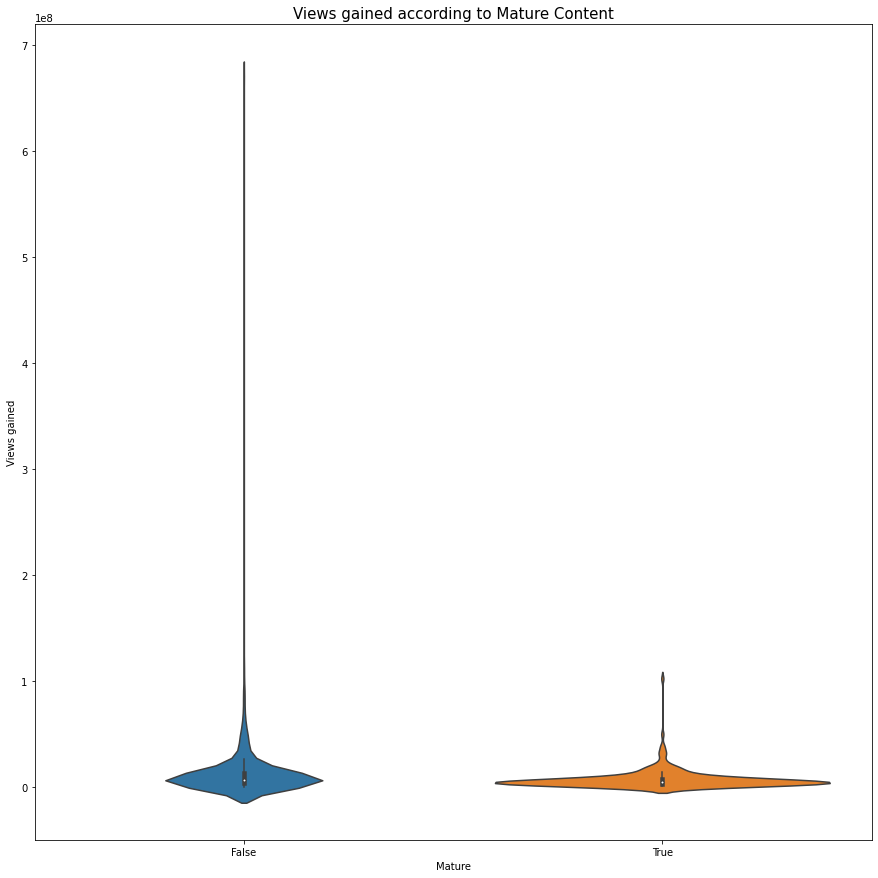

In [12]:
plt.figure(figsize=(15,15))
df = df.explode('Views gained')
sns.violinplot(data=df, x="Mature", y="Views gained")
plt.title("Views gained according to Mature Content", fontsize=15)
plt.show()

Now we want to see how Views gained varies with Partnered accounts. In general, we expect Twitch Partnered accounts to do better. Once again, the outlier obscures our plot a little, but comparing the violin plots is still feasible.

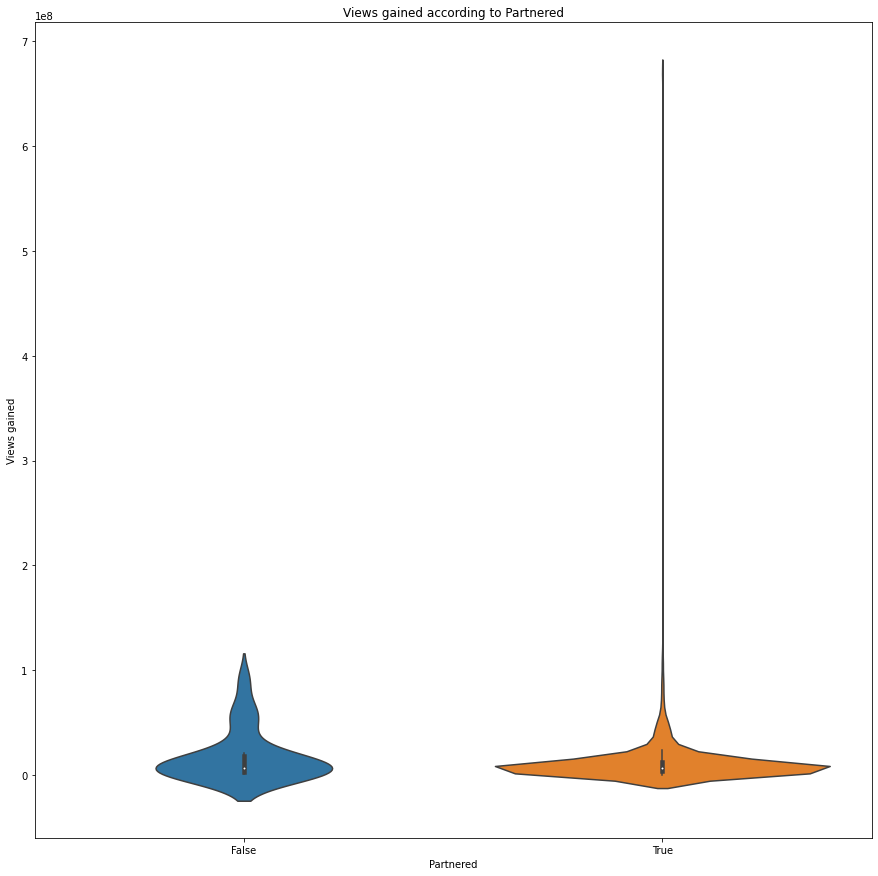

In [13]:
plt.figure(figsize=(15,15))
df = df.explode('Views gained')
sns.violinplot(data=df, x="Partnered", y="Views gained")
plt.title("Views gained according to Partnered")
plt.show()

**Insights:** From the above plots, it's hard to draw any concrete connection between Partnered and Mature content with Views gained. This tells us that these are relatively unimportant characteristics of streams in terms of gaining views. I found this rather surprising as these are usually considered important information regarding a streamer's profile.

## Views gained compared to Average Viewers

We want to compare Views gained with the Average views of a channel. In general, channels with more Average views are expected to gain more viewers, since they tend to be more popular in advertisements and SEO.

Text(0.5, 1.0, 'Views gained vs Average Viewers')

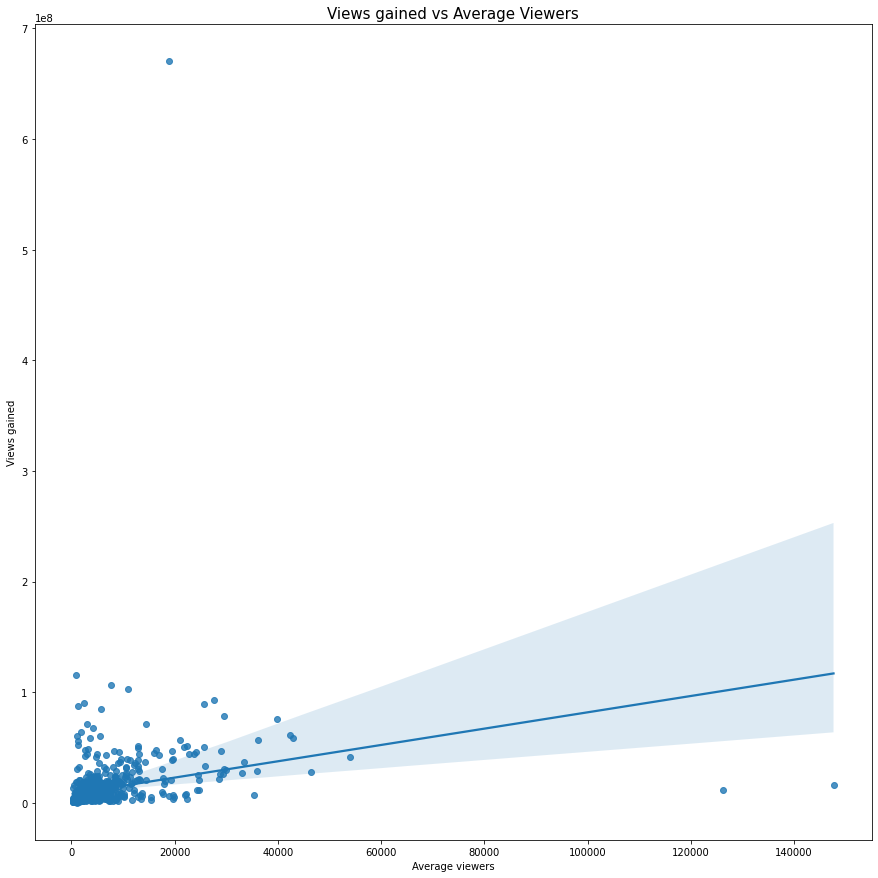

In [14]:
plt.figure(figsize=(15,15))
sns.regplot(x=df["Average viewers"], y=df["Views gained"])
plt.title("Views gained vs Average Viewers", fontsize=15)

**Insight:** The line of linear regression tells us that there is a general positive correlation between Average viewers and Views gained, which means that streamers with a higher number of viewers generally have higher Views gained, but there are many outliers in the plot that skew our visualization and go against the norm.

## Views gained compared to Followers

We want to compare and see the relationship between Views gained and Followers of a Channel. In general, channels with more Followers are more "popular", which means that they get more advertisements, endorsements, social media presence etc. Hence, we expect them to gain more views in general.

Text(0.5, 1.0, 'Views gained vs Followers')

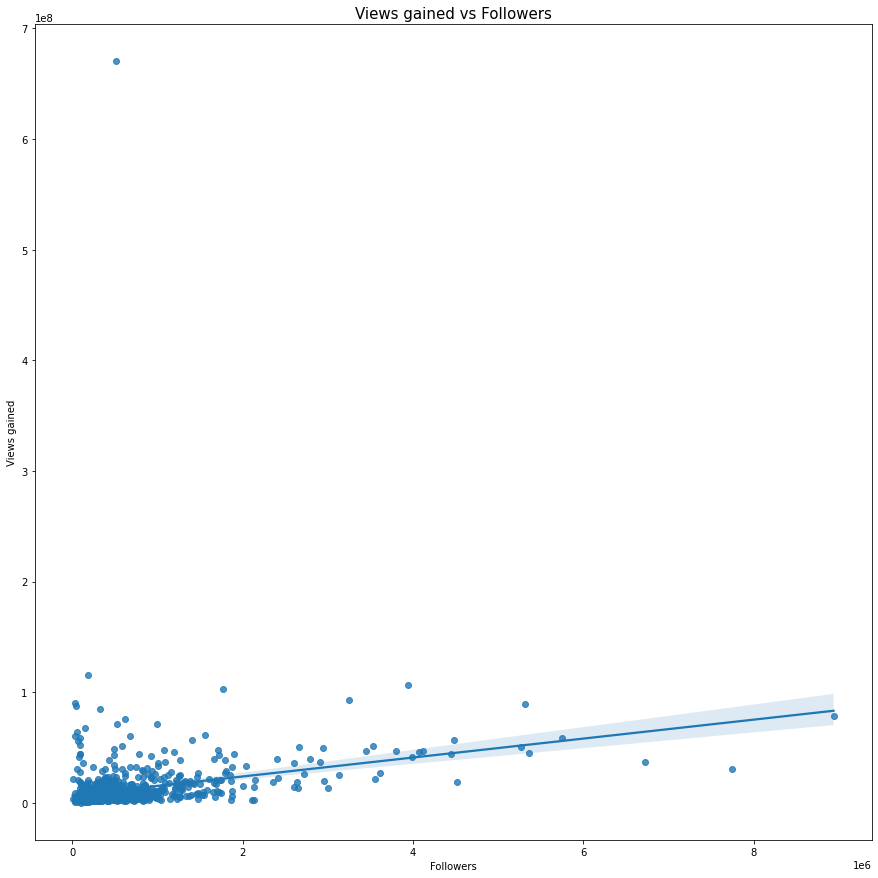

In [15]:
plt.figure(figsize=(15,15))
sns.regplot(x=df["Followers"], y=df["Views gained"])
plt.title("Views gained vs Followers", fontsize=15)

**Insight:** Once again, we see a general positive correlation. In this case, more data points follow the general trend of the regression line and the outliers, apart from one, are not too distant from the linear regression line, which means that Followers is a better metric to gauge Views gained than Average viewers.

## Views gained compared to Watch Time

We want to compare Views gained to Watch time(Minutes) of a channel. In general, a channel with more minutes of Watch time has more followers (based on the correlation heat map), which means more opportunities to gain more viewers.

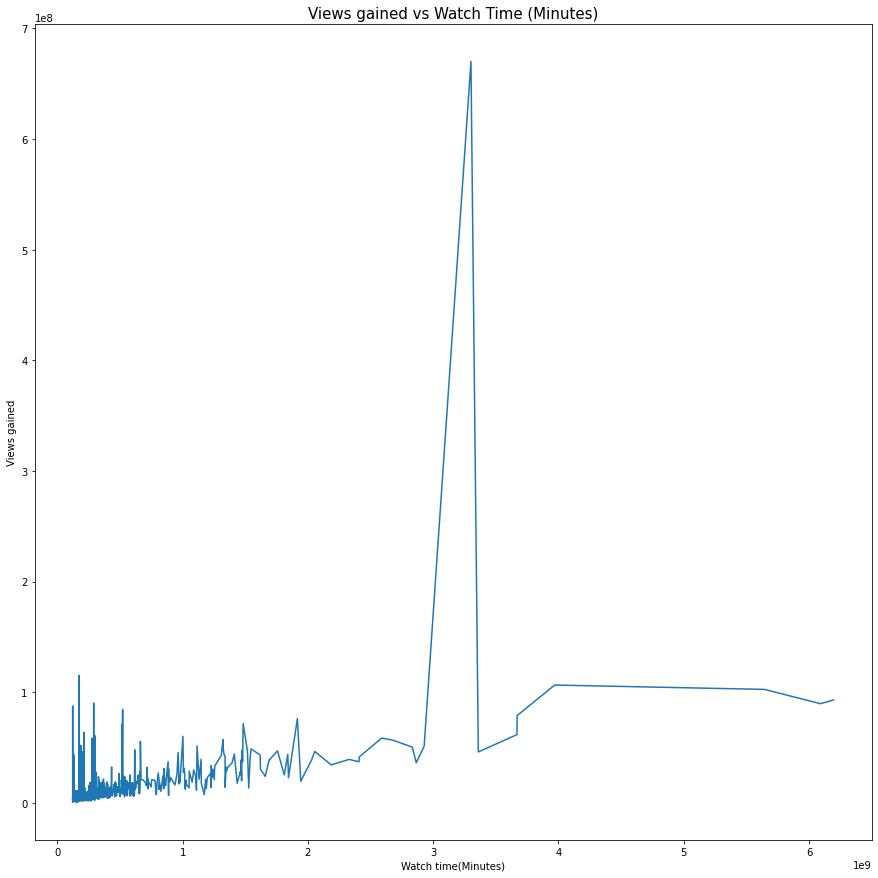

In [16]:
plt.figure(figsize=(15,15))
sns.lineplot(x=df["Watch time(Minutes)"], y=df["Views gained"])
plt.title("Views gained vs Watch Time (Minutes)", fontsize=15)
plt.show()

**Insight:** This line plot between Views gained and Watch time (minutes) is a curious one. From the heatmap above, we got the sense that these 2 variables are somewhat correlated, with a correlation value of 0.53. However, there many variations and spikes in the visualization, especially the giant outlier peak. This tells us that some of these extreme values probably skew the correlation in favor of the Watch time (minutes) variable.

## Analyzing Feature Importance


To answer our initial question about which variables affect Views gained the most, we perform regression using the ExtraTreesRegressor method from Scikit-learn library. We use this particular method to avoid overfitting provide accurate results. We focus on the quantitative variables for this calculation and ignore "Partnered", "Mature" and "Language" columns because we have already seen that they barely affect the Views gained metric.

<AxesSubplot:title={'center':'Feature Importance'}>

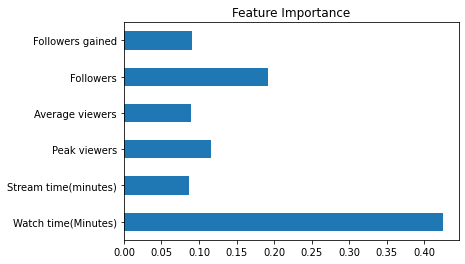

In [17]:
x = df.drop(["Channel", "Views gained", "Partnered", "Mature", "Language"], axis=1)
y = df["Views gained"]
model = ExtraTreesRegressor()
model.fit(x, y)
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.plot(kind="barh", title="Feature Importance")

**Insight:** As expected, Watch time(minutes) is the most impactful variable in determining Views gained for a channel. This calculation is useful for developing regression models to make predictions.

**Note:** It is worth mentioning that while this dataset has a lot of information, it is missing a major indicator which would help make better assessments about the variables in question. That indicator is Games Played. Twitch streamers become popular by playing games that are trending, and this trend changes by the week. To make better predictions for Views gained, specific information about which games are streamed by a channel, and the popularity of that game relative to the overall gaming industry would probably be very important information, and probably help our understanding of the dataset immensely.

## Main Lessons

My biggest takeaway from this assignment was that it can sometimes be very tedious to plot certain things in Python. Compared to creating visualizations in Tableau, Python was more approachable, but tricky to customize. However, preprocessing and manipulating the data is way easier in Python, so there's a tradeoff. I also learned that outliers are not just anomalies, but sometimes they can be important highlights of the dataset that may deserve special attention. Another lesson I learnt is that sometimes our visualization may not tell the story we expect it to tell. For instance, most visualizations I made above, I had certain expected results that didn't come across. It made me realize that visualizations help subvert expectations, and that's not necessarily a bad thing.